In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("HR_comma_sep.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
left = df[df["left"]==1] 
left.shape

(3571, 10)

In [6]:
retained = df[df["left"]==0]
retained.shape

(11428, 10)

In [7]:
df.groupby("left").mean()

C:\Users\abc\AppData\Local\Temp\ipykernel_1272\189522867.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("left").mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary', ylabel='left'>

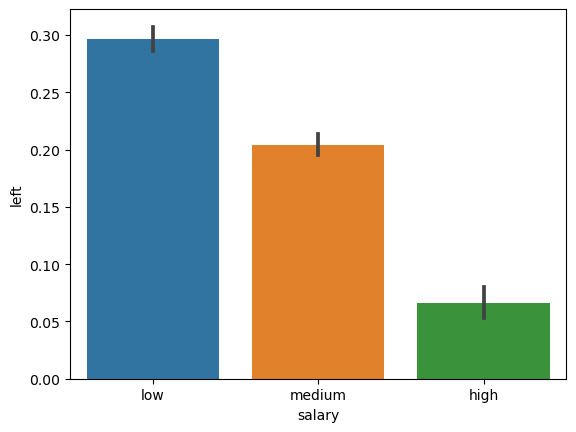

In [8]:
sns.barplot(x ="salary",y = "left",data = df)

<Axes: xlabel='Department'>

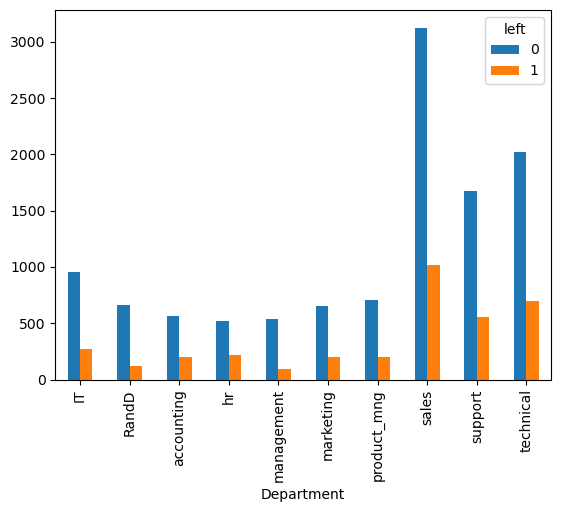

In [10]:
pd.crosstab(df.Department,df.left).plot(kind = "bar")

In [11]:
df1 = df[["satisfaction_level","average_montly_hours","promotion_last_5years","salary"]]

In [12]:
df1

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [14]:
dummies = pd .get_dummies(df1["salary"])

In [15]:
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [16]:
merged = pd.concat([df1,dummies],axis ="columns")

In [17]:
merged

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [23]:
x= df2 = merged.drop(["salary","medium"],axis = "columns")

In [24]:
x

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1
...,...,...,...,...,...
14994,0.40,151,0,0,1
14995,0.37,160,0,0,1
14996,0.37,143,0,0,1
14997,0.11,280,0,0,1


In [25]:
y = df["left"]

In [26]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [31]:
len(x_train)

10499

In [32]:
len(x_test)

4500

In [40]:
x_test

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
8566,0.53,241,0,0,1
13644,0.75,250,0,0,0
7124,0.83,257,0,0,1
11332,0.73,243,0,0,1
1103,0.38,156,0,0,1
...,...,...,...,...,...
10024,0.85,199,0,0,1
3349,0.93,237,0,0,1
14895,0.43,129,0,0,0
4771,0.52,218,0,0,0


In [35]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()

In [36]:
model.fit(x_train,y_train)

LogisticRegression()

In [37]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
model.score(x,y)

0.7751850123341556